In [109]:
import graphviz

In [252]:
class unit:
    
    def __init__(self, data, _operation = None, _children = (), _grad = 0.0, requires_gradient = False) -> None:
        self.data = data
        self._operation = _operation
        self._children = set(_children)
        self._grad = _grad
        self._backward = lambda : None
        self.requires_gradient = requires_gradient
            
    def  __repr__(self) -> str:
        return f"(Data = {self.data})"

    def __add__(self, other):
        if not isinstance(other, unit):
            other = unit(other)
        
        def backward(): 
            self._grad += 1 * out._grad
            other._grad += 1 * out._grad
            return
        
        out = unit(self.data + other.data, _operation= '+', _children=(self, other))
        out._backward = backward
        return out
    
    def __sub__(self,other):
        return self + (-other.data)

    def __mul__(self, other):
        if not isinstance(other, unit):
            other = unit(other)
        def backward():
            self._grad += other.data * out._grad
            other._grad +=  self.data * out._grad
            return 

        out = unit(self.data*other.data, _operation= '*', _children=(self, other))
        out._backward = backward 
        return out 

    def __rmul__(self, other):
        return (other * self.data)
    
    

In [245]:

f = unit(7)

c = unit(3)

e = unit(4)

d = c + e

L = d * f 

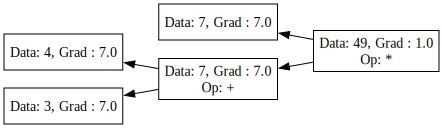

In [251]:
visualize_unit(L)

In [247]:
L._grad = 1.0

In [248]:
L._backward()

In [249]:
d._grad

7.0

In [250]:
d._backward()

In [192]:
from graphviz import Digraph
import uuid
from IPython.display import display

def generate_graphviz(unit_obj):
    dot = Digraph(comment='Unit Tree')
    dot.attr(rankdir='RL')  # Changed from 'TB' to 'LR' for left-to-right layout
    
    def add_node(node):
        node_id = str(uuid.uuid4())
        label = f"Data: {node.data}, Grad : {node._grad}"
        if node._operation:
            label += f"\nOp: {node._operation}"
        dot.node(node_id, label, shape='rectangle')
        
        for child in node._children:
            child_id = add_node(child)
            dot.edge(node_id, child_id)
        
        return node_id

    add_node(unit_obj)
    return dot

def visualize_unit(unit_obj, filename='unit_tree'):
    dot = generate_graphviz(unit_obj)
    return dot

# Function to display in Jupyter notebook
def display_unit(unit_obj):
    dot = visualize_unit(unit_obj)
    display(dot)

In [276]:
import random
class neuron(unit):
    
    def __init__(self, n_in) -> None:
        self._w = [unit(random.uniform(-1,1)) for _ in range(n_in)]
        self._b = unit(0)
        self._parameters = (self._w,self._b)

    def parameters(self):
        return self._parameters
    
    def flush_gradients(self)-> None:
        for w in self._w:
            w._grad = 0
        self._b.grad = 0
        return
    def compute(self, inputs):
        if len(self._w) == len(inputs):
            return self._b + sum([(w*x).data for x,w in zip(inputs, self._w)]) 
        else:
            print("input size mismatch") 

In [277]:
n1 = neuron(2)
n1.parameters()

([(Data = 0.43813570522075684), (Data = 0.03445745170612691)], (Data = 0))

In [278]:
n1.compute([x[1], x[2]])

TypeError: bad operand type for unary +: 'unit'

In [267]:
x = [0, 1, 2, 3,  4, 5]
y = [-1, 1, 3, 5, 7, 9]

In [ ]:
#<img src="images.png" alt="SNOWFALL" width="600" height="400">
